In [17]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.api import qqplot
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('student_performance.csv')

r-squared for simmply linear regressions (1 response variable and 1 explanatory variable)

R-squared for more than one explanatory variable (1 response variable and 1> explanatory variable)

In [4]:
StudyHoursPerWeek_vs_FinalGrade = ols("FinalGrade ~ StudyHoursPerWeek", data = df).fit()
StudyHoursPerWeek_vs_FinalGrade.rsquared

0.8583818359937763

Output explanation

0 means that the model does not explain any of the variance, and 1 means that the model explains all the variance in the dependent variable.

In [6]:
coeff_determination = df["StudyHoursPerWeek"].corr(df["FinalGrade"]) ** 2
coeff_determination

0.8583818359937767

The rsquared and the square of the correlation coefficient generates the same output ONLY for simple linear regression

In [12]:
mse = StudyHoursPerWeek_vs_FinalGrade.mse_resid
rse = np.sqrt(mse)
print(f'MSE (Means Squared Error) {mse}')
print(f'RSE (Residual standard error) {rse}')
print(f'The difference between predicted FinalGrade and observed FinalGrade is typically about {round(rse)}%.')

MSE (Means Squared Error) 16.243603411513867
RSE (Residual standard error) 4.03033539690109
The difference between predicted FinalGrade and observed FinalGrade is typically about 4%.


MSE indicates the degrees of freedom, opposite the RMSE not

<AxesSubplot:xlabel='StudyHoursPerWeek', ylabel='FinalGrade'>

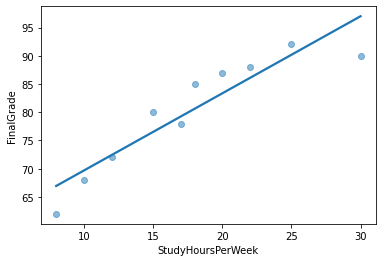

In [23]:
sns.regplot(x='StudyHoursPerWeek',
         y='FinalGrade',
         data=df,
         ci=None,
         scatter_kws={'alpha': 0.5}) 

If the trend line is close to zero, then the residuals met the assumption!! (the observations are close to the straight line, and the errors are minimized)


Text(0, 0.5, 'Residuals')

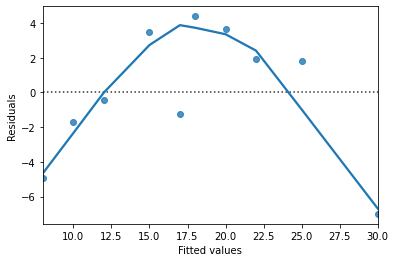

In [21]:
print('If the trend line is close to zero, then the residuals met the assumption!! (the observations are close to the straight line, and the errors are minimized)')
sns.residplot(x="StudyHoursPerWeek", y="FinalGrade", data=df, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

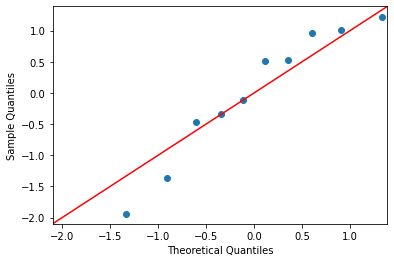

In [20]:
qqplot(data=StudyHoursPerWeek_vs_FinalGrade.resid, fit=True, line="45") 
plt.show()

QQ plot explanation

Straight line - normal dist

S-shaped curve - heavy tails

Convex shapes - skewness

Outliers - points that deviate significantly from the line

<AxesSubplot:ylabel='FinalGrade'>

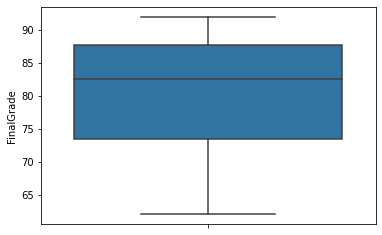

In [27]:
sns.boxplot( y="FinalGrade", data=df)

The direction of the trend line is based on the observations. Goes up more residuals, goes down less residuals
If the trend line goes up and down then indicating poor fit


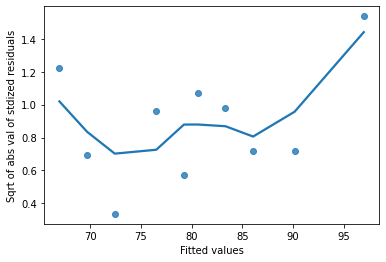

In [29]:
model_norm_residuals = StudyHoursPerWeek_vs_FinalGrade.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
sns.regplot(x=StudyHoursPerWeek_vs_FinalGrade.fittedvalues, y=model_norm_residuals_abs_sqrt, ci=None, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt of abs val of stdized residuals")
print('The direction of the trend line is based on the observations. Goes up more residuals, goes down less residuals')
print('If the trend line goes up and down then indicating poor fit')

In [34]:
# Leverage is a measure of how extreme the explanatory variable values are.
# Inffuence measures how much the model would change if you left the observation out of the data set when modeling.
mdl_df = ols("FinalGrade ~ StudyHoursPerWeek", data = df).fit()
summary_df = mdl_df.get_influence().summary_frame()
df["leverage"] = summary_df["hat_diag"]
df["cooks_dist"] = summary_df["cooks_d"] # Cook's distance is the most common measure of influence.


In [35]:
df

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,leverage,cooks_dist
0,1,John,Male,85,15,78,1,High,80,0.117271,0.056369
1,2,Sarah,Female,90,20,85,2,Medium,87,0.112533,0.058855
2,3,Alex,Male,78,10,65,0,Low,68,0.240464,0.036281
3,4,Michael,Male,92,25,90,3,High,92,0.226250,0.038871
4,5,Emma,Female,88,18,82,2,Medium,85,0.100213,0.073435
5,6,Olivia,Female,95,30,88,1,High,90,0.458422,2.358805
6,7,Daniel,Male,70,8,60,0,Low,62,0.322909,0.531134
7,8,Sophia,Female,85,17,77,1,Medium,78,0.101161,0.005962
8,9,James,Male,82,12,70,2,Low,72,0.176972,0.001376
9,10,Isabella,Female,91,22,86,3,High,88,0.143805,0.022401


### Olivia           

Leverage: 0.4584 (highest among all observations)       

Cook’s Distance: 2.3588 (significantly above 1).

This combination suggests it could be an outlier or a highly impactful data point.

### Daniel           

Leverage: 0.3229 (relatively high).                     

Cook’s Distance: 0.5311 (moderately high but below the threshold of 1)

Daniel’s data shows moderately high leverage and Cook's Distance, indicating it influences the model but not as critically as Olivia's.

#### All other observations have leverage and Cook’s Distance values within normal ranges. Their influence on the model is not concerning.


##### Perform the analysis with and without Olivia

##### Keep Daniel in the analysis but be aware of his influence